In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [251]:
df = pd.read_csv('training_v2.csv')

In [252]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [253]:
df.shape

(91713, 186)

In [254]:
test = pd.read_csv('unlabeled.csv')

In [255]:
test.shape

(39308, 186)

In [256]:
# test.head()

In [257]:
# df.T.isna().sum().max()

In [258]:
# test.T.isna().sum().max()

In [259]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,91713.0,88993.000000,37334.000000,90051.000000,90612.000000,91713.000000,90998.000000,33579.000000,72451.00000,72860.000000,20845.000000,89812.000000,89812.000000,90676.000000,89812.000000,80677.000000,90835.000000,71835.000000,90998.000000,90719.000000,20845.000000,20845.000000,20845.000000,20845.000000,90479.000000,73113.000000,87605.000000,42715.000000,90998.000000,69701.000000,23729.000000,23729.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,23936.000000,23936.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,23754.000000,23754.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,16785.000000,16785.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,16869.000000,16869.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,16798.000000,

In [260]:
# patient id is unique
df['patient_id'].nunique()

91713

In [261]:
# keep hospital id for one-hot encoding. Patient death might depend on the quality of the hospital
df['hospital_id'].nunique()

147

### Age Feature

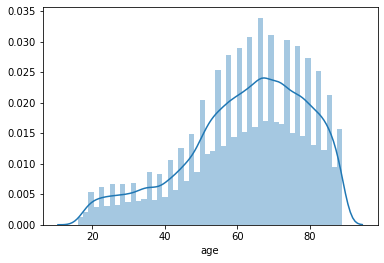

In [262]:
sns.distplot(df['age'].dropna())

In [263]:
age_corr_df = abs(df.corr()) > 0.5

In [264]:
# Nothing is highly correlated with age
age_corr_df[age_corr_df['age'] == True]['age']

age    True
Name: age, dtype: bool

In [265]:
df['age'].describe()['mean']

62.309515917014345

In [266]:
# imputing the mean age
df['age'].fillna(value=df['age'].describe()['mean'], inplace=True)

In [267]:
df['age'].isna().sum()

0

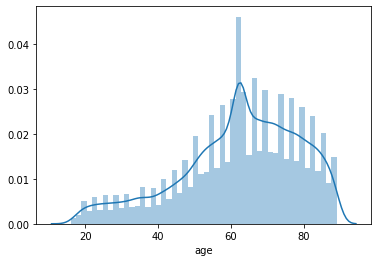

In [268]:
# distribution after mean imputation
sns.distplot(df['age']);

### BMI, Height, Weight Features

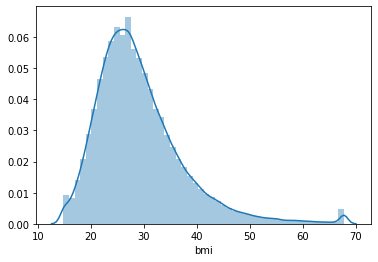

In [269]:
# seem to have a group of outliers in the right tail
sns.distplot(df['bmi'].dropna())

In [270]:
df['bmi'].isna().sum()

3429

In [271]:
df['bmi'].describe()

count    88284.000000
mean        29.185818
std          8.275142
min         14.844926
25%         23.641975
50%         27.654655
75%         32.930206
max         67.814990
Name: bmi, dtype: float64

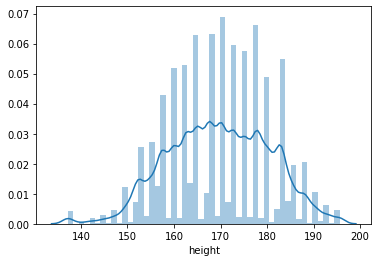

In [272]:
sns.distplot(df['height'].dropna())

In [273]:
df['height'].isna().sum()

1334

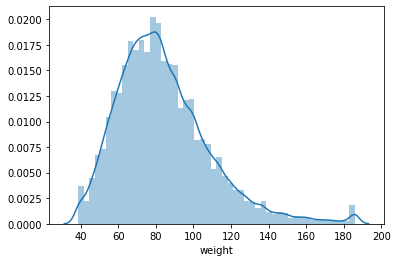

In [274]:
sns.distplot(df['weight'].dropna())

In [275]:
df['weight'].isna().sum()

2720

In [276]:
df.groupby('gender').mean()[['height', 'weight']]

,height,weight
gender,,
F,161.679830,77.277623
M,176.432256,89.785557


In [277]:
height_weight_by_gender = df.groupby('gender').mean()[['height', 'weight']]

In [278]:
df.gender.value_counts(dropna=False)

M      49469
F      42219
NaN       25
Name: gender, dtype: int64

In [279]:
avg_height = height_weight_by_gender['height'].mean()
avg_weight = height_weight_by_gender['weight'].mean()

In [280]:
df.loc[(df['height']> avg_height) & (df['gender'].isna()), 'gender'] = 'M'
df.loc[(df['height']< avg_height) & (df['gender'].isna()), 'gender'] = 'F'

In [281]:
df.gender.value_counts(dropna=False)

M      49482
F      42225
NaN        6
Name: gender, dtype: int64

In [282]:
df.loc[(df['weight']> avg_weight) & (df['gender'].isna()), 'gender'] = 'M'
df.loc[(df['weight']< avg_weight) & (df['gender'].isna()), 'gender'] = 'F'

In [283]:
df['gender'].value_counts(dropna=False)

M      49483
F      42227
NaN        3
Name: gender, dtype: int64

In [284]:
df['gender'].fillna(value='M', inplace=True)

In [285]:
# num remaining nulls
len(df[df['gender'].isna()])

0

In [286]:
height_weight_by_gender.loc['F']

height    161.679830
weight     77.277623
Name: F, dtype: float64

In [287]:
#fill in average height and weight based on patient gender
df.loc[(df['gender'] == 'F') & (df['weight'].isna()), 'weight'] = height_weight_by_gender.loc['F']['weight']
df.loc[(df['gender'] == 'F') & (df['height'].isna()), 'height'] = height_weight_by_gender.loc['F']['height']
df.loc[(df['gender'] == 'M') & (df['weight'].isna()), 'weight'] = height_weight_by_gender.loc['M']['weight']
df.loc[(df['gender'] == 'M') & (df['height'].isna()), 'height'] = height_weight_by_gender.loc['M']['height']
df['bmi'] = df['weight'] / (df['height']/100)**2

In [288]:
df.isna().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                                  0
bmi                                  0
elective_surgery                     0
ethnicity                         1395
gender                               0
height                               0
hospital_admit_source            21409
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                               0
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [289]:
df.corr()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
encounter_id,1.000000,-0.009575,-0.004532,-0.005243,-0.003897,-0.002314,0.002036,-0.004960,-0.000992,-0.000570,NaN,-0.004183,0.006262,0.000113,-0.000651,0.001138,0.007920,-0.002198,0.002619,0.005435,-0.000824,0.003276,0.007664,0.002400,0.006516,0.002108,-0.001718,0.001566,-0.003172,0.000759,0.015002,0.015002,-0.001088,-0.005632,0.006498,-0.007004,0.005162,-0.009225,-0.005775,-0.009363,-0.013306,-0.004230,-0.002547,0.000802,-0.002229,0.001202,-0.003891,-0.002045,-0.004260,-0.003335,-0.000332,-0.000553,0.000734,-0.000472,0.006880,-0.000296,0.000041,0.000512,-0.008091,0.001666,-0.000484,-0.002455,-0.000063,-0.002115,-0.004533,0.003035,-0.001694,-0.004417,-0.001529,0.003506,0.000586,0.005045,-0.000167,-0.000930,0.000956,0.000565,-0.000261,0.002202,0.000654,0.002838,0.002682,0.000351,-0.001577,-0.004182,0.004066,0.001393,0.002714,0.000849,0.002974,0.001240,-0.003970,-0.001013,0.003400,0.004386,-0.001386,-0.000563,0.002679,0.002602,0.002559,0.004862,0.005521,0.004719,0.003672,0.002068,0.001422,0.002499,0.001250,0.000771,0.001625,0.000353,-0.006878,-0.005783,-0.001177,-0.004329,0.001177,0.00205

In [290]:
df.loc[(df['gender'] == 'F') & (df['weight'].isna()), 'weight'] 

Series([], Name: weight, dtype: float64)

In [291]:
# composite function to clean dataset
def impute_missing_values(df):
    df_new = df.copy(deep=True)
    #impute missing ages with mean 
    df_new['age'].fillna(value=df_new['age'].describe()['mean'], inplace=True)
    
    #find mean height and weight by gender
    height_weight_by_gender = df_new.groupby('gender').mean()[['height', 'weight']]
    avg_height = height_weight_by_gender['height'].mean()
    avg_weight = height_weight_by_gender['weight'].mean()
    
    #impute missing gender based on average height and weight
    #where F are < average and M are > average
    df_new.loc[(df_new['height']> avg_height) & (df_new['gender'].isna()), 'gender'] = 'M'
    df_new.loc[(df_new['height']< avg_height) & (df_new['gender'].isna()), 'gender'] = 'F'
    df_new.loc[(df_new['weight']> avg_weight) & (df_new['gender'].isna()), 'gender'] = 'M'
    df_new.loc[(df_new['weight']< avg_weight) & (df_new['gender'].isna()), 'gender'] = 'F'
    
    #any patients without height or weight information are defaulted to M
    df_new['gender'].fillna(value='M', inplace=True)
    
    #impute average height and weight based on patient gender
    df_new.loc[(df_new['gender'] == 'F') & (df_new['weight'].isna()), 'weight'] = height_weight_by_gender.loc['F']['weight']
    df_new.loc[(df_new['gender'] == 'F') & (df_new['height'].isna()), 'height'] = height_weight_by_gender.loc['F']['height']
    df_new.loc[(df_new['gender'] == 'M') & (df_new['weight'].isna()), 'weight'] = height_weight_by_gender.loc['M']['weight']
    df_new.loc[(df_new['gender'] == 'M') & (df_new['height'].isna()), 'height'] = height_weight_by_gender.loc['M']['height']
    
    #calculate bmi using weight and height (no more NAN values)
    df_new['bmi'] = df_new['weight'] / (df_new['height']/100)**2
    
    #replace NANs 
    
    return df_new

In [292]:
df.shape

(91713, 186)

In [293]:
x = ['albumin_apache','bilirubin_apache','fio2_apache','paco2_for_ph_apache', 'paco2_apache','pao2_apache','ph_apache',
'urineoutput_apache','d1_diasbp_invasive_max','d1_diasbp_invasive_min','d1_mbp_invasive_max','d1_mbp_invasive_min',
 'd1_sysbp_invasive_max','d1_sysbp_invasive_min','h1_diasbp_invasive_max','h1_diasbp_noninvasive_min','h1_mbp_invasive_max',
 'h1_mbp_invasive_min','h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_sysbp_invasive_max','h1_sysbp_invasive_min',
 'h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min','d1_albumin_max','d1_albumin_min','d1_bilirubin_max','d1_bilirubin_min',
 'd1_inr_max','d1_inr_min','d1_lactate_max','d1_lactate_min','h1_albumin_max','h1_albumin_min','h1_bilirubin_max',
 'h1_bilirubin_min','h1_bun_max','h1_bun_min','h1_calcium_max','h1_calcium_min','h1_creatinine_max','h1_creatinine_min',
 'h1_glucose_max','h1_glucose_min','h1_hco3_max','h1_hco3_min','h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max',
 'h1_hematocrit_min','h1_inr_max','h1_inr_min','h1_lactate_max','h1_lactate_min','h1_platelets_max','h1_platelets_min',
 'h1_potassium_max','h1_potassium_min','h1_sodium_max','h1_sodium_min' ,'h1_wbc_max','h1_wbc_min','d1_arterial_pco2_max',
 'd1_arterial_pco2_min' ,'d1_arterial_ph_max' ,'d1_arterial_ph_min','d1_arterial_po2_max','d1_arterial_po2_min',
 'd1_pao2fio2ratio_max','d1_pao2fio2ratio_min','h1_arterial_pco2_max','h1_arterial_pco2_min','h1_arterial_ph_max',
 'h1_arterial_ph_min','h1_arterial_po2_max','h1_arterial_po2_min','h1_pao2fio2ratio_max','h1_pao2fio2ratio_min',
     'h1_diasbp_invasive_min' ]

In [294]:
df.drop(['icu_id','readmission_status','hospital_admit_source','encounter_id','patient_id'],axis=1, inplace=True)
# drop columns with > 50% missing values
df.drop(x, axis=1, inplace=True)

In [295]:
x = ['albumin_apache','bilirubin_apache','fio2_apache','paco2_for_ph_apache', 'paco2_apache','pao2_apache','ph_apache',
'urineoutput_apache','d1_diasbp_invasive_max','d1_diasbp_invasive_min','d1_mbp_invasive_max','d1_mbp_invasive_min',
 'd1_sysbp_invasive_max','d1_sysbp_invasive_min','h1_diasbp_invasive_max','h1_diasbp_noninvasive_min','h1_mbp_invasive_max',
 'h1_mbp_invasive_min','h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_sysbp_invasive_max','h1_sysbp_invasive_min',
 'h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min','d1_albumin_max','d1_albumin_min','d1_bilirubin_max','d1_bilirubin_min',
 'd1_inr_max','d1_inr_min','d1_lactate_max','d1_lactate_min','h1_albumin_max','h1_albumin_min','h1_bilirubin_max',
 'h1_bilirubin_min','h1_bun_max','h1_bun_min','h1_calcium_max','h1_calcium_min','h1_creatinine_max','h1_creatinine_min',
 'h1_glucose_max','h1_glucose_min','h1_hco3_max','h1_hco3_min','h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max',
 'h1_hematocrit_min','h1_inr_max','h1_inr_min','h1_lactate_max','h1_lactate_min','h1_platelets_max','h1_platelets_min',
 'h1_potassium_max','h1_potassium_min','h1_sodium_max','h1_sodium_min' ,'h1_wbc_max','h1_wbc_min','d1_arterial_pco2_max',
 'd1_arterial_pco2_min' ,'d1_arterial_ph_max' ,'d1_arterial_ph_min','d1_arterial_po2_max','d1_arterial_po2_min',
 'd1_pao2fio2ratio_max','d1_pao2fio2ratio_min','h1_arterial_pco2_max','h1_arterial_pco2_min','h1_arterial_ph_max',
 'h1_arterial_ph_min','h1_arterial_po2_max','h1_arterial_po2_min','h1_pao2fio2ratio_max','h1_pao2fio2ratio_min','h1_diasbp_invasive_min']
 


In [296]:
df.drop(['icu_id','readmission_status','hospital_admit_source','encounter_id','patient_id','apache_3j_diagnosis'],axis=1, inplace=True)

KeyError: "['icu_id' 'readmission_status' 'hospital_admit_source' 'encounter_id'\n 'patient_id'] not found in axis"

In [375]:
df.shape

(91713, 125)

In [376]:
#fill means
df.d1_heartrate_max.fillna(df.d1_heartrate_max.mean(),inplace=True)
df.d1_heartrate_min.fillna(df.d1_heartrate_min.mean(),inplace=True) 
df.d1_mbp_max.fillna(df.d1_mbp_max.mean(),inplace=True) 
df.d1_mbp_min.fillna(df.d1_mbp_min.mean(),inplace=True) 
df.d1_resprate_max.fillna(df.d1_resprate_max.mean(),inplace=True) 
df.d1_resprate_min.fillna(df.d1_resprate_min.mean(),inplace=True) 
df.d1_spo2_max.fillna(df.d1_spo2_max.mean(),inplace=True) 
df.d1_spo2_min.fillna(df.d1_spo2_min.mean(),inplace=True) 
df.d1_sysbp_max.fillna(df.d1_sysbp_max.mean(),inplace=True) 
df.d1_sysbp_min.fillna(df.d1_sysbp_min.mean(),inplace=True) 

#fill categoricals
df.ethnicity.fillna('Other/Unknown',inplace=True)

#fill numerical categories
df.gcs_eyes_apache.fillna(4.0, inplace=True)
df.gcs_motor_apache.fillna(6.0, inplace=True)
df.gcs_unable_apache.fillna(0.0, inplace=True)
df.intubated_apache.fillna(0.0, inplace=True)
df.arf_apache.fillna(0.0, inplace=True)
df.ventilated_apache.fillna(0.0, inplace=True)
df.aids.fillna(0.0, inplace=True)
df.cirrhosis.fillna(0.0, inplace=True)
df.diabetes_mellitus.fillna(0.0, inplace=True)
df.hepatic_failure.fillna(0.0, inplace=True)
df.immunosuppression.fillna(0.0, inplace=True)
df.leukemia.fillna(0.0, inplace=True)
df.lymphoma.fillna(0.0, inplace=True)
df.solid_tumor_with_metastasis.fillna(0.0, inplace=True)

In [377]:
df.loc[df.d1_temp_max.isna(),'d1_temp_max'] = df.loc[df.d1_temp_max.isna(),'temp_apache']
df.loc[df.d1_temp_min.isna(),'d1_temp_min'] = df.loc[df.d1_temp_min.isna(),'temp_apache']


#fillna
df.icu_admit_source.fillna('Other Hospital',inplace=True)


#drop due to multicollinearity or duplicate
df.drop(['d1_diasbp_max','d1_diasbp_noninvasive_max','d1_mbp_noninvasive_max','d1_diasbp_min','d1_diasbp_noninvasive_min','d1_mbp_noninvasive_min','gcs_verbal_apache'],axis=1,inplace=True)
df.drop(['bun_apache','creatinine_apache','hematocrit_apache','sodium_apache','wbc_apache','glucose_apache','d1_hemaglobin_max','d1_hemaglobin_min','heart_rate_apache','apache_2_bodysystem'],axis=1,inplace=True)


KeyError: 'temp_apache'

In [378]:
df.drop('apache_3j_diagnosis', axis=1, inplace=True)

In [355]:
df.drop(labels='h1_diasbp_noninvasive_max', axis=1, inplace=True)

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.ethnicity.value_counts(normalize=True, dropna=False)

In [373]:
df['ethnicity'].fillna(value='Other/Unknown', inplace=True)

In [374]:
df.ethnicity.value_counts(normalize=True, dropna=False)

Caucasian           0.770709
African American    0.104096
Other/Unknown       0.062903
Hispanic            0.041390
Asian               0.012310
Native American     0.008592
Name: ethnicity, dtype: float64

In [ ]:
df.groupby('ethnicity').mean()

In [ ]:
col_names = df.columns

In [ ]:
cols_working = []
for col in col_names:
    if col.startswith('gcs'):
        cols_working.append(col)

In [ ]:
cols_working

In [ ]:
df[cols_working].describe()

In [ ]:
df[cols_working].corr()

In [ ]:
df_gcs = df[cols_working].copy()

In [297]:
df_gcs[df_gcs['gcs_unable_apache'].isna()].isna().sum()

gcs_eyes_apache      1037
gcs_motor_apache     1037
gcs_unable_apache    1037
dtype: int64

In [298]:
df_gcs.isna().sum()

gcs_eyes_apache      1901
gcs_motor_apache     1901
gcs_unable_apache    1037
dtype: int64

In [299]:
df_gcs[(df_gcs['gcs_eyes_apache'].isna()) & (df_gcs['gcs_unable_apache'].isna() == False)]

,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache
128,NaN,NaN,1.0
776,NaN,NaN,1.0
8380,NaN,NaN,1.0
9707,NaN,NaN,1.0
10577,NaN,NaN,1.0
...,...,...,...
82674,NaN,NaN,1.0
83686,NaN,NaN,1.0
85159,NaN,NaN,1.0
87415,NaN,NaN,1.0


In [300]:
df_gcs.groupby('gcs_eyes_apache').mean()

,gcs_motor_apache,gcs_unable_apache
gcs_eyes_apache,,
1.0,2.206309,0.0
2.0,4.495513,0.0
3.0,5.619851,0.0
4.0,5.939789,0.0


In [301]:
df_gcs.groupby('gcs_motor_apache').mean()

,gcs_eyes_apache,gcs_unable_apache
gcs_motor_apache,,
1.0,1.153888,0.0
2.0,1.466019,0.0
3.0,1.778626,0.0
4.0,2.037606,0.0
5.0,2.699950,0.0
6.0,3.843207,0.0


In [302]:
df_gcs.groupby('gcs_unable_apache').mean()

,gcs_eyes_apache,gcs_motor_apache
gcs_unable_apache,,
0.0,3.465049,5.471195
1.0,NaN,NaN


In [303]:
df_gcs.groupby('gcs_verbal_apache').mean()

KeyError: 'gcs_verbal_apache'

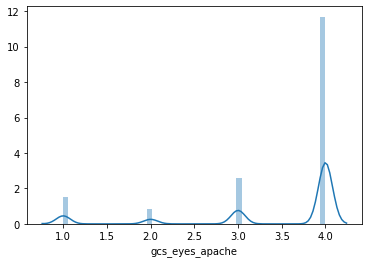

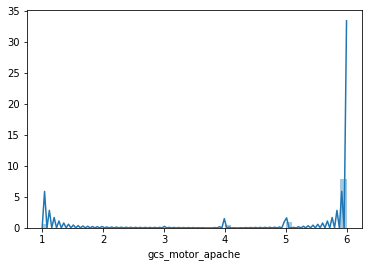

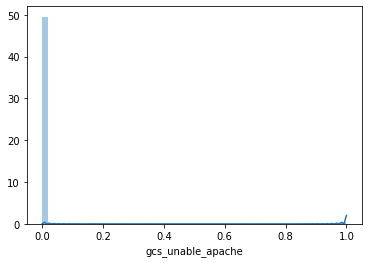

In [304]:
for col in df_gcs:
    sns.distplot(df_gcs[col].dropna())
    plt.show()

In [305]:
df[df['elective_surgery'].isna()]

,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem


In [306]:
temp_cols = [col for col in col_names if col.find('temp') != -1]

In [307]:
df[temp_cols].isna().sum()

temp_apache     4108
d1_temp_max     2324
d1_temp_min     2324
h1_temp_max    21732
h1_temp_min    21732
dtype: int64

In [308]:
df.loc[df.d1_temp_max.isna(),'d1_temp_max'] = df.loc[df.d1_temp_max.isna(),'h1_temp_max']
df.loc[df.d1_temp_min.isna(),'d1_temp_min'] = df.loc[df.d1_temp_min.isna(),'h1_temp_min']
df.drop(['temp_apache','h1_temp_max','h1_temp_min'],axis=1,inplace=True)

In [309]:
df[['d1_temp_max', 'd1_temp_min']].isna().sum()

d1_temp_max    2324
d1_temp_min    2324
dtype: int64

In [310]:
glucose_cols = [col for col in col_names if col.find('glucose') != -1]

In [311]:
glucose_cols

['d1_glucose_max', 'd1_glucose_min']

In [312]:
df.shape

(91713, 99)

In [313]:
df[glucose_cols].isna().sum()

d1_glucose_max    5807
d1_glucose_min    5807
dtype: int64

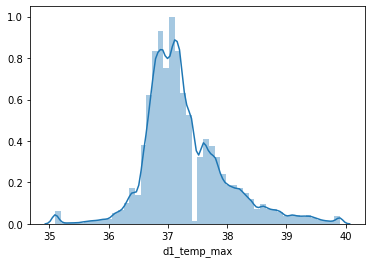

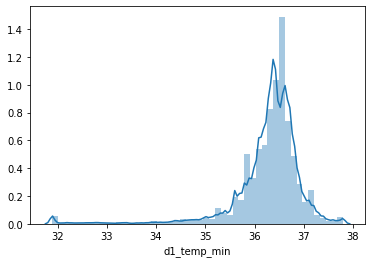

In [314]:
for col in ['d1_temp_max', 'd1_temp_min']:
    sns.distplot(df[col].dropna())
    plt.show()

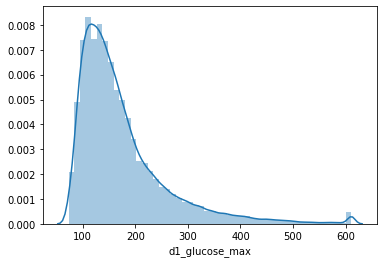

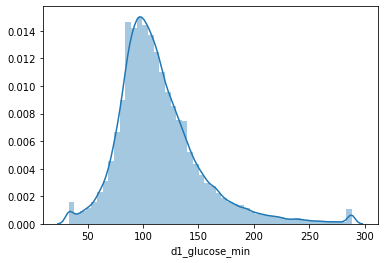

In [315]:
for col in glucose_cols:
    sns.distplot(df[col].dropna())
    plt.show()

In [356]:
max_cols = [col for col in df.columns if col.find('max') != -1]

In [357]:
min_cols = [col for col in df.columns if col.find('min') != -1]

In [358]:
cols_to_fill_with_median = max_cols + min_cols

In [359]:
#check
[col[:-4] for col in min_cols] == [col[:-4] for col in max_cols]

True

In [361]:
cols_to_find_diff = [col[:-4] for col in df.columns if col.find('max') != -1]

In [366]:
# cols_to_find_diff

In [363]:
def fill_with_median(df, col_list):
    """
    """
    new_df = df.copy(deep=True)
    for col in col_list:
        new_df[col].fillna(value=new_df[col].median(), inplace=True)
    return new_df

In [364]:
def find_diff(df, col_list):
    """
    """
    new_df = df.copy(deep=True)
    for col in col_list:
        col_name = col + '_diff'
        min_col_name = col + '_min'
        max_col_name = col + '_max'
        new_df[col_name] = new_df[max_col_name] - new_df[min_col_name]
    return new_df

In [367]:
df = fill_with_median(df, cols_to_fill_with_median)
df = find_diff(df, cols_to_find_diff)

In [380]:
cols_with_null_values = df.isna().sum()[df.isna().sum() != 0]

In [389]:
remaining_null_cols = list(cols_with_null_values.reset_index()['index'])

In [392]:
df[remaining_null_cols].describe()

,apache_2_diagnosis,bun_apache,creatinine_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,map_apache,resprate_apache,sodium_apache,wbc_apache,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
count,90051.000000,72451.00000,72860.000000,89812.000000,80677.000000,90835.000000,71835.000000,90719.000000,90479.000000,73113.000000,69701.000000,83766.000000,83766.000000
mean,185.401739,25.82533,1.480014,3.994778,160.326822,99.707932,32.988739,88.015873,25.811007,137.966373,12.133333,0.086787,0.043955
std,86.050882,20.67298,1.525787,1.560166,90.790551,30.870502,6.873585,42.032412,15.106312,5.279418,6.917984,0.247569,0.217341
min,101.000000,4.00000,0.300000,1.000000,39.000000,30.000000,16.200000,40.000000,4.000000,117.000000,0.900000,-1.000000,-1.000000
25%,113.000000,13.00000,0.720000,4.000000,97.000000,86.000000,28.000000,54.000000,11.000000,135.000000,7.500000,0.020000,0.010000
50%,122.000000,19.00000,0.980000,5.000000,133.000000,104.000000,33.200000,67.000000,28.000000,138.000000,10.400000,0.050000,0.020000
75%,301.000000,32.00000,1.530000,5.000000,196.000000,120.000000,37.900000,125.000000,36.000000,141.000000,15.100000,0.130000,0.060000
max,308.000000,127.00000,11.180000,5.000000,598.700000,178.000000,51.400000,200.000000,60.000000,158.000000,45.800000,0.990000,0.970000


In [395]:
remaining_null_cols.remove(['icu_admit_source', 'apache_3j_bodysystem', 'apache_2_bodysystem'])

ValueError: list.remove(x): x not in list

In [399]:
remaining_null_cols.remove('apache_3j_bodysystem')

In [400]:
remaining_null_cols.remove('apache_2_bodysystem')

In [401]:
remaining_null_cols

['apache_2_diagnosis',
 'bun_apache',
 'creatinine_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'wbc_apache',
 'apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob']

In [402]:
df = fill_with_median(df, remaining_null_cols)

In [404]:
df['icu_admit_source'].value_counts()

Accident & Emergency         54060
Operating Room / Recovery    18713
Floor                        15611
Other Hospital                2358
Other ICU                      859
Name: icu_admit_source, dtype: int64

In [411]:
df['icu_admit_source'].fillna('Other Hospital', inplace=True)

In [405]:
df['apache_3j_bodysystem'].value_counts()

Cardiovascular          29999
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: apache_3j_bodysystem, dtype: int64

In [409]:
df['apache_3j_bodysystem'].fillna('Other', inplace=True)

In [406]:
df['apache_2_bodysystem'].value_counts()

Cardiovascular         38816
Neurologic             11896
Respiratory            11609
Gastrointestinal        9026
Metabolic               7650
Trauma                  3842
Undefined diagnoses     3768
Renal/Genitourinary     2460
Haematologic             638
Undefined Diagnoses      346
Name: apache_2_bodysystem, dtype: int64

In [407]:
df.drop('apache_2_bodysystem', axis=1, inplace=True)

In [412]:
df.isna().sum()

hospital_id                      0
hospital_death                   0
age                              0
bmi                              0
elective_surgery                 0
ethnicity                        0
gender                           0
height                           0
icu_admit_source                 0
icu_stay_type                    0
icu_type                         0
pre_icu_los_days                 0
weight                           0
apache_2_diagnosis               0
apache_post_operative            0
arf_apache                       0
bun_apache                       0
creatinine_apache                0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
glucose_apache                   0
heart_rate_apache                0
hematocrit_apache                0
intubated_apache                 0
map_apache                       0
resprate_apache                  0
sodium_apache       

In [316]:
fill_with_median_cols = ['d1_glucose_max', 'd1_glucose_min'] + ['d1_temp_max', 'd1_temp_min']

In [317]:
df[fill_with_median_cols].describe()

,d1_glucose_max,d1_glucose_min,d1_temp_max,d1_temp_min
count,85906.000000,85906.000000,89389.000000,89389.000000
mean,174.638023,114.380940,37.284201,36.268391
std,86.687955,38.273013,0.693287,0.745147
min,73.000000,33.000000,35.100000,31.889000
25%,117.000000,91.000000,36.900000,36.100000
50%,150.000000,107.000000,37.110000,36.400000
75%,201.000000,131.000000,37.600000,36.660000
max,611.000000,288.000000,39.900000,37.800000


In [318]:
df['d1_glucose_max'].fillna(value=df['d1_glucose_max'].median())

0        168.0
1        145.0
2        150.0
3        185.0
4        150.0
         ...  
91708    400.0
91709    177.0
91710    538.0
91711    150.0
91712    158.0
Name: d1_glucose_max, Length: 91713, dtype: float64

In [319]:
for col in fill_with_median_cols:
    df[col].fillna(value=df[col].median(), inplace=True)

In [320]:
df[fill_with_mean_cols].isna().sum()

d1_glucose_max    0
d1_glucose_min    0
d1_temp_max       0
d1_temp_min       0
dtype: int64

In [321]:
df[fill_with_median_cols].describe()

,d1_glucose_max,d1_glucose_min,d1_temp_max,d1_temp_min
count,91713.000000,91713.000000,91713.000000,91713.000000
mean,173.078015,113.913600,37.279786,36.271726
std,84.112920,37.085108,0.684994,0.735936
min,73.000000,33.000000,35.100000,31.889000
25%,119.000000,92.000000,36.900000,36.100000
50%,150.000000,107.000000,37.110000,36.400000
75%,196.000000,129.000000,37.600000,36.600000
max,611.000000,288.000000,39.900000,37.800000


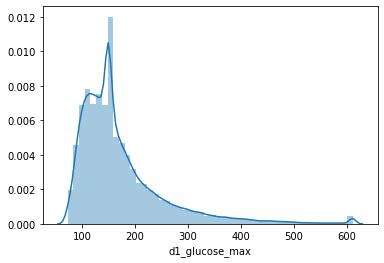

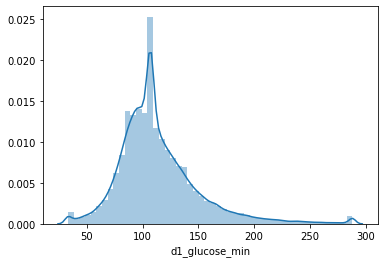

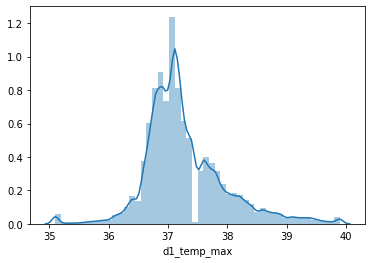

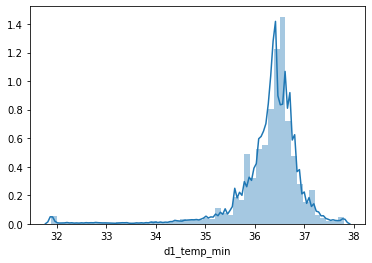

In [322]:
for col in fill_with_median_cols:
    sns.distplot(glucose_df[col])#.dropna())
    plt.show()

In [323]:
cols_to_take_diff = ['d1_glucose', 'd1_temp']

In [324]:
for col in cols_to_take_diff:
    col_name = col + '_diff'
    min_col_name = col + '_min'
    max_col_name = col + '_max'
    df[col_name] = df[max_col_name] - df[min_col_name]

In [325]:
cols_corr = [col + '_diff' for col in cols_to_take_diff] +\
            fill_with_median_cols +\
            ['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'hospital_death']

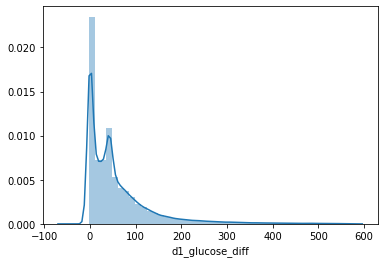

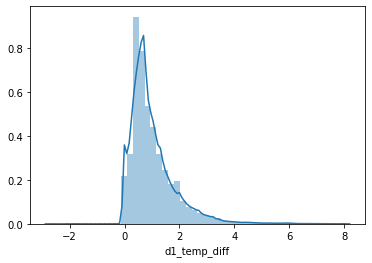

In [326]:
for col in [col + '_diff' for col in cols_to_take_diff]:
    sns.distplot(df[col])#.dropna())
    plt.show()

In [327]:
df[cols_corr].corr()

,d1_glucose_diff,d1_temp_diff,d1_glucose_max,d1_glucose_min,d1_temp_max,d1_temp_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,hospital_death
d1_glucose_diff,1.000000,0.125645,0.897940,-0.059427,0.019332,-0.130206,0.114777,0.114532,0.071918
d1_temp_diff,0.125645,1.000000,0.096027,-0.045558,0.572751,-0.646414,0.221068,0.230389,0.175446
d1_glucose_max,0.897940,0.096027,1.000000,0.385977,0.007998,-0.105822,0.113626,0.110763,0.079359
d1_glucose_min,-0.059427,-0.045558,0.385977,1.000000,-0.022381,0.032905,0.016588,0.010619,0.029251
d1_temp_max,0.019332,0.572751,0.007998,-0.022381,1.000000,0.255209,0.034944,0.040029,0.005006
d1_temp_min,-0.130206,-0.646414,-0.105822,0.032905,0.255209,1.000000,-0.228196,-0.234465,-0.202283
apache_4a_hospital_death_prob,0.114777,0.221068,0.113626,0.016588,0.034944,-0.228196,1.000000,0.878988,0.311043
apache_4a_icu_death_prob,0.114532,0.230389,0.110763,0.010619,0.040029,-0.234465,0.878988,1.000000,0.283913
hospital_death,0.071918,0.175446,0.079359,0.029251,0.005006,-0.202283,0.311043,0.283913,1.000000


In [328]:
df[fill_with_mean_cols].isna().sum()

d1_glucose_max    0
d1_glucose_min    0
d1_temp_max       0
d1_temp_min       0
dtype: int64

In [330]:
df.describe()

,hospital_id,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,d1_glucose_diff,d1_temp_diff
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,90051.000000,90612.000000,91713.000000,90998.000000,72451.00000,72860.000000,89812.000000,89812.000000,90676.000000,89812.000000,80677.000000,90835.000000,71835.000000,90998.000000,90719.000000,90479.000000,73113.000000,90998.000000,69701.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,91554.000000,91554.00000,90686.000000,90686.000000,91713.000000,91713.000000,88094.000000,88094.000000,84363.000000,88923.000000,88923.000000,87074.000000,87074.000000,87356.000000,87356.000000,87528.000000,87528.000000,88102.000000,88102.000000,81199.000000,81199.000000,78644.000000,78644.000000,81544.000000,81544.000000,91713.000000,91713.000000,76642.000000,76642.000000,79566.000000,79566.000000,80059.000000,80059.000000,78269.000000,78269.000000,82128.000000,82128.000000,81518.000000,81518.000000,78539.000000,78539.000000,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,91713.000000,91713.000000
mean,105.669262,0.086302,62.309516,29.131097,0.183736,169.639666,0.835766,84.026563,185.401739,558.216377,0.201106,0.027979,25.82533,1.480014,3.465049,5.471195,0.009528,3.994778,160.326822,99.707932,32.988739,0.151223,88.015873,25.811007,137.966373,0.325721,12.133333,88.491873,50.161314,88.610513,50.242597,103.000568,70.321848,104.651339,64.871859,104.590454,64.941541,28.882774,12.846279,99.241836,90.454826,148.339745,96.92387,148.235549,96.993313,37.279786,36.271726,75.354508,62.838150,75.805934,92.229198,83.663720,91.612950,79.400028,22.633614,17.211525,98.044637,95.174310,133.247395,116.362296,25.685745,23.767469,8.378881,8.179575,1.488650,1.366947,173.078015,113.913600,24.366500,23.170486,11.448195,10.887875,34.531970,32.951813,207.105674,196.769779,4.251594,3.934658,139.124101,137.722144,12.476302,11.313536,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,59.164415,1.008061
std,62.854406,0.280811,16.383883,8.010791,0.387271,10.753312,2.487756,24.661226,86.050882,463.266985,0.400829,0.164912,20.67298,1.525787,0.951715,1.288376,0.097148,1.560166,90.790551,30.870502,6.873585,0.358268,42.032412,15.106312,5.279418,0.468646,6.917984,19.798379,13.317586,19.793743,13.341521,22.017346,17.115903,20.808358,15.679680,20.701171,15.701305,10.701973,5.064943,1.794181,10.0

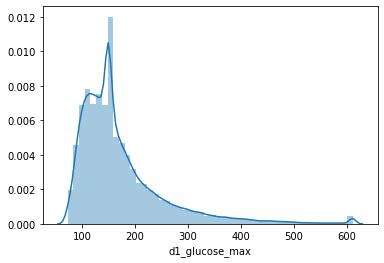

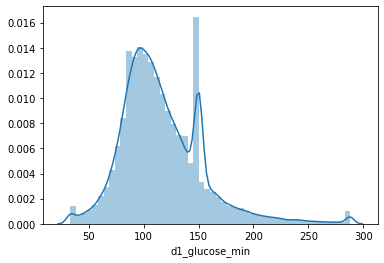

In [198]:
for col in glucose_cols:
    sns.distplot(df[col].dropna())
    plt.show()

In [112]:
df.loc[df['hospital_death'] == 0,['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'hospital_death']].sample(10)

,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,hospital_death
12072,0.13,0.05,0
23868,0.29,0.15,0
79862,NaN,NaN,0
19952,0.06,0.02,0
23742,NaN,NaN,0
90317,0.52,0.45,0
71993,0.02,0.01,0
47608,0.01,0.00,0
33559,0.04,0.02,0
18530,0.05,0.02,0


In [100]:
df.corr()#[(df.corr()>.5) | (df.corr()<-.5)]

,hospital_id,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,intubated_apache,map_apache,resprate_apache,ventilated_apache,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
hospital_id,1.000000,-0.001255,-0.008472,0.014813,0.052123,0.028183,-0.001285,0.026212,0.006806,0.053985,0.000732,-0.012096,-0.020657,-0.017554,0.027271,0.001011,-0.023262,0.030136,-0.012893,-0.005446,-0.027260,0.016287,-0.042791,-0.005735,-0.001345,0.011366,-0.037468,0.014523,-0.037839,0.015300,0.008933,-0.039365,-0.002574,-0.010827,0.004452,-0.015428,-0.023639,0.000597,-0.010510,-0.032078,-0.032271,0.018389,0.013308,-0.005402,-0.015266,-0.011573,-0.010407,-0.012085,-0.023039,-0.000339,-0.000092,-0.000811,0.016819,-0.015983,-0.013032,0.007311,-0.000798,-0.018324,-0.019764,0.010070,-0.012084,0.008817,-0.004790,0.009416,0.003155,-0.006993,-0.000283,-0.004946,0.002869,0.011572,0.001283,0.000040,-0.003034,0.002537,-0.004804
hospital_death,-0.001255,1.000000,0.106603,-0.031532,-0.093574,-0.019633,0.063316,-0.037797,-0.089862,-0.083674,0.027009,-0.250703,-0.273661,0.051223,0.171728,-0.040526,0.086666,0.226405,0.162735,-0.003583,-0.016722,-0.194916,0.102807,0.025596,-0.008457,-0.209462,-0.027306,-0.209780,-0.026716,-0.209926,0.006373,-0.206958,-0.032064,-0.124924,-0.035433,0.113603,0.087138,-0.061685,-0.141619,0.121933,0.110725,-0.047453,-0.108551,-0.068797,-0.146440,0.186558,0.181383,-0.076577,-0.130456,0.115563,0.106409,0.081568,0.029884,-0.126455,-0.163213,-0.035586,-0.068281,-0.030154,-0.057701,0.112465,0.025080,0.055664,-0.007020,0.143862,0.121420,0.311043,0.283913,0.004354,0.039129,-0.016173,0.038554,0.043589,0.029554,0.018565,0.050701
age,-0.008472,0.106603,1.000000,-0.083384,0.066359,-0.106145,0.049085,-0.122589,0.022489,0.058331,-0.001672,0.025535,0.025141,-0.007693,0.015200,-0.015529,0.036624,0.040510,-0.132075,-0.139958,0.005949,-0.128354,0.031384,0.033342,-0.036927,-0.081518,0.104693,-0.058488,0.104171,-0.058693,-0.080843,-0.068454,-0.143281,-0.195326,-0.133233,-0.160883,-0.161599,-0.057757,-0.106211,0.027397,0.029225,-0.058340,-0.070696,0.046369,-0.005026,0.232745,0.258723,0.022814,0.046557,0.052580,0.070238,0.012429,0.065641,0.062584,0.097827,-0.120630,-0.118340,-0.081014,-0.080744,0.059909,0.108756,0.006980,0.037500,-0.002922,-0.001528,0.139482,0.074677,-0.029477,-0.027996,0.076709,-0.019971,0.024853,0.029738,0.022959,0.025701
bmi,0.014813,-0.031532,-0.083384,1.000000,0.017467,-0.051435,-0.000177,0.890725,0.027635,0.017013,-0.006164,0.013198,0.021248,0.005103,0.036966,0.056177,0.002135,0.069520,-0.031523,0.013625,0.062174,0.015262,0.005007,-0.010515,-0.066887,-0.024618,0.081162,0.052638,0.081931,0.053467,0.023420,0.035692,0.032343,0.006554,0.032610,-0.017619,-0.006387,0.039831,0.019743,0.005509,-0.005473,-0.056860,-0.032312,0.060027,0.046600,0.049097,0.054434,0.065634,0.070158,0.067318,0.068975,0.100276,0.134121,0.096114,0.091918,0.090984,0.091290,0.018106,0.017427,0.087118,0.093422,-0.024822,-0.016501,0.023680,0.022693,-0.033411,-0.014713,-0.020027,-0.002860,0.171132,-0.001816,-0.030265,-0.013803,-0.010021,-0.042424
elect

In [56]:
# check for NAN values
round(df.isna().sum()/df.shape[0]*100, 2)

hospital_id                       0.00
hospital_death                    0.00
age                               0.00
bmi                               0.00
elective_surgery                  0.00
ethnicity                         1.52
gender                            0.00
height                            0.00
icu_admit_source                  0.12
icu_stay_type                     0.00
icu_type                          0.00
pre_icu_los_days                  0.00
weight                            0.00
apache_2_diagnosis                1.81
apache_3j_diagnosis               1.20
apache_post_operative             0.00
arf_apache                        0.78
bun_apache                       21.00
creatinine_apache                20.56
gcs_eyes_apache                   2.07
gcs_motor_apache                  2.07
gcs_unable_apache                 1.13
gcs_verbal_apache                 2.07
glucose_apache                   12.03
heart_rate_apache                 0.96
hematocrit_apache        

In [93]:
def twoSum(self, nums: List[int], target: int) -> List[int]:
    for i, num in enumerate(nums):
        for j, num2 in enumerate(nums):
            if num + num 2 == target:
                return [i, j]
            else:
                continue

SyntaxError: invalid syntax (<ipython-input-93-33d4f92d9558>, line 4)

In [22]:
# Number of features with > 10% missing values
len(df.isna().sum()[round(df.isna().sum()/df.shape[0]*100, 2) > 10])

103

In [21]:
# features without missing values
df.isna().sum()[round(df.isna().sum()/df.shape[0]*100, 2) == 0]

encounter_id             0
patient_id               0
hospital_id              0
hospital_death           0
elective_surgery         0
icu_id                   0
icu_stay_type            0
icu_type                 0
pre_icu_los_days         0
readmission_status       0
apache_post_operative    0
dtype: int64